In [5]:
# imports
import ast
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import src.evaluation.util as util

In [6]:
# define paths
regr_results_log_path = '../logs/regr_results/'
aggr_class_report_log_path = '../data/'

In [8]:
# load regression results table
result_file = regr_results_log_path + "regr_results.csv"
df_regr_results = pd.read_csv(result_file)

# TODO: delete
# df_regr_results = df_regr_results[:-2]
# df_regr_results.to_csv(result_file, index=False)

df_regr_results

,regressor,regressand,model,classification_task,n,split_random_state,group_by,delta,zscore_threshold,pearsonr,p_value,estimator,neg_rmse_train,neg_rmse_test,r2_train,r2_test,best_params
0,accuracy,false_labels_ratio,all,all,800,912,"{'model': False, 'classes': False, 'ratio': Fa...",False,False,-0.566728,3.683329e-69,SVR(),-2.639984,-2.598762,0.311027,0.331372,"{'C': 0.1, 'coef0': 0.8, 'degree': 3, 'gamma':..."
1,accuracy,false_labels_ratio,all,all,800,834,"{'model': False, 'classes': False, 'ratio': Fa...",True,False,-0.685227,5.649470e-112,SVR(),-2.215508,-1.977529,0.521816,0.612834,"{'C': 0.1, 'coef0': 0.3, 'degree': 3, 'gamma':..."
2,accuracy,false_labels_ratio,all,all,40,446,"{'model': True, 'classes': True, 'ratio': True}",False,False,-0.694982,6.494926e-07,SGDRegressor(),-2.359996,-1.474735,0.470651,0.155145,"{'alpha': 0.01, 'epsilon': 1.0, 'learning_rate..."
3,accuracy,false_labels_ratio,all,all,40,950,"{'model': True, 'classes': True, 'ratio': True}",True,False,-0.959305,1.808955e-22,SGDRegressor(),-0.945238,-0.342539,0.914743,0.981595,"{'alpha': 0.0001, 'epsilon': 0.01, 'learning_r..."
4,accuracy,false_labels_ratio,basic,all,400,572,"{'model': False, 'classes': False, 'ratio': Fa...",False,False,-0.656738,1.009297e-50,SGDRegressor(),-2.341389,-2.606999,0.457209,0.327126,"{'alpha': 0.01, 'epsilon': 0.01, 'learning_rat..."
5,accuracy,false_labels_ratio,basic,all,400,810,"{'model': False, 'classes': False, 'ratio': Fa...",True,False,-0.775330,1.885346e-81,GradientBoostingRegressor(),-1.946580,-1.941799,0.770760,0.626698,"{'alpha': 0.1, 'learning_rate': 0.1, 'loss': '..."
6,accuracy,false_labels_ratio,resnet,all,400,874,"{'model': False, 'classes': False, 'ratio': Fa...",False,False,-0.535549,4.546967e-31,SVR(),-2.732216,-2.591825,0.304654,0.334936,"{'C': 0.1, 'coef0': 0.1, 'degree': 2, 'gamma':..."
7,accuracy,false_labels_ratio,resnet,all,400,421,"{'model': False, 'classes': False, 'ratio': Fa...",True,False,-0.606235,1.680564e-41,SVR(),-2.377533,-2.038756,0.485076,0.588488,"{'C': 0.1, 'coef0': 0.3, 'degree': 2, 'gamma':..."
8,accuracy,false_labels_ratio,all,4,400,266,"{'model': False, 'classes': False, 'ratio': Fa...",False,False,-0.637745,4.723786e-47,SGDRegressor(),-2.471893,-2.370937,0.397024,0.443466,"{'alpha': 1e-05, 'epsilon': 0.1, 'learning_rat..."
9,accuracy,false_labels_ratio,all,4,400,389,"{'model': False, 'classes': False, 'ratio': Fa...",True,False,-0.682183,4.452303e-56,SVR(),-2.265345,-2.210958,0.500394,0.516036,"{'C': 10.0, 'coef0': 0.1, 'degree': 2, 'gamma'..."


In [12]:
df_regr_results.query('model == "basic" & classification_task == "4" & delta == False')

,regressor,regressand,model,classification_task,n,split_random_state,group_by,delta,zscore_threshold,pearsonr,p_value,estimator,neg_rmse_train,neg_rmse_test,r2_train,r2_test,best_params
12,accuracy,false_labels_ratio,basic,4,200,455,"{'model': False, 'classes': False, 'ratio': Fa...",False,False,-0.647585,3.674059e-25,SGDRegressor(),-2.438686,-2.309673,0.403592,0.471856,"{'alpha': 0.001, 'epsilon': 0.01, 'learning_ra..."
32,accuracy,false_labels_ratio,basic,4,200,395,"{'model': False, 'classes': False, 'ratio': Fa...",False,False,-0.647585,3.674059e-25,LinearRegression(),-2.398077,-2.777649,0.461751,0.236153,{}
40,accuracy,false_labels_ratio,basic,4,200,347,"{'model': False, 'classes': False, 'ratio': Fa...",False,False,-0.647585,3.674059e-25,"Pipeline(steps=[('polynomialfeatures', Polynom...",-2.332391,-2.298064,0.460889,0.477151,{'polynomialfeatures__degree': 2}


[Text(0.5, 1.0, 'pearsonr over neg_rmse_train')]

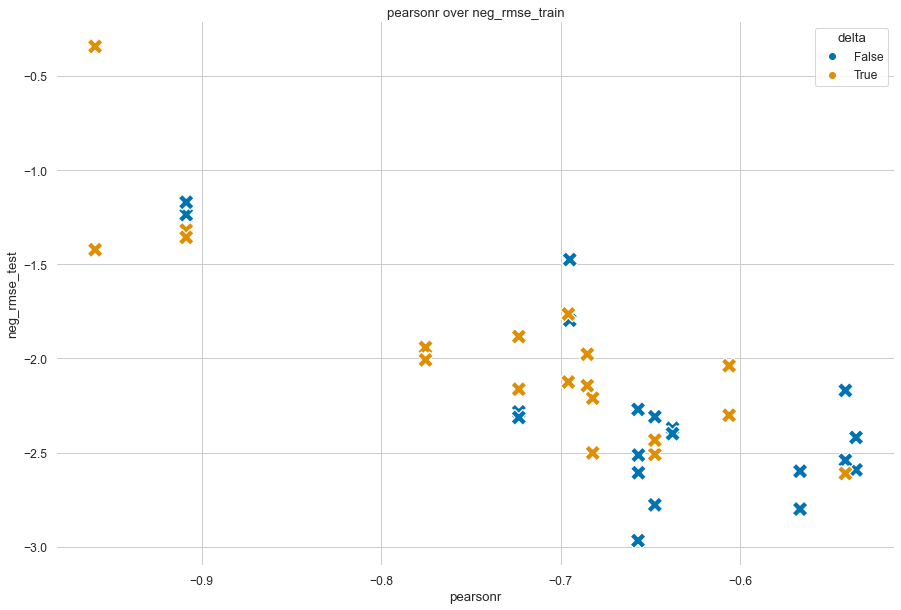

In [5]:
df_temp = df_regr_results.iloc[:]

sns.set(font_scale = 1.1)
sns.set_style("whitegrid")
f, (ax1) = plt.subplots(1, 1, figsize=(15, 10))
sns.despine(left=True, bottom=True)

sns.scatterplot(
            data=df_temp,
            x='pearsonr',
            y='neg_rmse_test',
            ax=ax1,
            # hue=df_temp.index,
            hue='delta',
            palette='colorblind',
            s=250,
            marker='X'
        ).set(
            # xlabel='false labels ratio (%)',
            # ylabel='model accuracy',
            # ylim=(0.5,1),
            title='pearsonr over neg_rmse_train'
        )

In [6]:
# per model class ratio setup
df_temp = df_regr_results.iloc[[32, 34, 36, 38]]
df_temp[['n', 'pearsonr', 'p_value', 'neg_rmse_train', 'neg_rmse_test', 'r2_train', 'r2_test']].describe()

,n,pearsonr,p_value,neg_rmse_train,neg_rmse_test,r2_train,r2_test
count,4.0,4.000000,4.000000e+00,4.000000,4.000000,4.000000,4.000000
mean,200.0,-0.705248,3.112422e-17,-2.215157,-2.107781,0.509733,0.526142
std,0.0,0.154728,6.224844e-17,0.645517,0.676775,0.242821,0.259320
min,200.0,-0.908589,5.293921e-77,-2.926375,-2.777649,0.225949,0.236153
25%,200.0,-0.769657,8.306634e-34,-2.530151,-2.429549,0.402800,0.411611
50%,200.0,-0.685465,1.837029e-25,-2.280264,-2.241668,0.498848,0.501987
75%,200.0,-0.621057,3.112422e-17,-1.965269,-1.919900,0.605781,0.616519
max,200.0,-0.541473,1.244969e-16,-1.373724,-1.170138,0.815288,0.864442


In [7]:
# per model class ratio setup - delta
df_temp = df_regr_results.iloc[[33, 35, 37, 39]]
df_temp[['n', 'pearsonr', 'p_value', 'neg_rmse_train', 'neg_rmse_test', 'r2_train', 'r2_test']].describe()

,n,pearsonr,p_value,neg_rmse_train,neg_rmse_test,r2_train,r2_test
count,4.0,4.000000,4.000000e+00,4.000000,4.000000,4.000000,4.000000
mean,200.0,-0.705248,3.112422e-17,-2.253812,-2.071340,0.505905,0.551255
std,0.0,0.154728,6.224844e-17,0.672855,0.568218,0.230288,0.224105
min,200.0,-0.908589,5.293921e-77,-2.940036,-2.610991,0.285090,0.325064
25%,200.0,-0.769657,8.306634e-34,-2.541917,-2.478232,0.386586,0.391373
50%,200.0,-0.685465,1.837029e-25,-2.373342,-2.158818,0.455980,0.531098
75%,200.0,-0.621057,3.112422e-17,-2.085237,-1.751926,0.575299,0.690979
max,200.0,-0.541473,1.244969e-16,-1.328529,-1.356736,0.826568,0.817761


In [8]:
# grouped by model-class-ratio
# 22 normal, 23 delta
df_temp = df_regr_results.iloc[[22, 23]]
df_temp[['n', 'pearsonr', 'p_value', 'neg_rmse_train', 'neg_rmse_test', 'r2_train', 'r2_test']].head()

,n,pearsonr,p_value,neg_rmse_train,neg_rmse_test,r2_train,r2_test
22,40,-0.694982,6.494926e-07,-2.392254,-1.796707,0.401091,0.825025
23,40,-0.959305,1.808955e-22,-0.912806,-1.422403,0.920828,0.887108


In [8]:
# --> TODO: select index of regression to use for y_true / y_pred visualization <--
index = 3

# set regression parameters based on row of regression result table using index
regressor = df_regr_results.iloc[index]['regressor']

cnn = df_regr_results.iloc[index]['model']
if cnn == 'all': cnn = False

classes = df_regr_results.iloc[index]['classification_task']
if classes == 'all': classes = False

use_delta = df_regr_results.iloc[index]['delta']

group_by = df_regr_results.iloc[index]['group_by']
group_by = ast.literal_eval(group_by)
use_grouping = any(group_by.values())

random_state = df_regr_results.iloc[index]['split_random_state']
zscore_threshold = df_regr_results.iloc[index]['zscore_threshold']

best_params = df_regr_results.iloc[index]['best_params']
best_params = ast.literal_eval(best_params)

estimator_name = df_regr_results.iloc[index]['estimator'][:-2]

In [9]:
# load classification results table
df_class_results_raw = util.load_aggr_class_reports(aggr_class_report_log_path)

# process data based on parameters
df_regression = df_class_results_raw.query(f'metric == "{regressor}"')
df_regression = df_regression.drop(['run'], axis=1)
df_regression = df_regression.rename(columns={'value': regressor})
df_regression = util.calc_delta(df_class_results_raw, df_regression, regressor)

# filter data for set properties
df_regression = util.filter_data(
    use_grouping, group_by, df_regression, cnn, classes
)

# filter outliers if properties are set
df_regression = util.filter_outliers(
    df_regression, regressor, use_grouping, zscore_threshold
)

df_regression.reset_index(inplace=True, drop=True)
print(f'\tRegression df.shape: {df_regression.shape}')

	800 classification reports loaded - df.shape (5600, 6)
	0 outliers filtered
	Regression df.shape: (40, 5)


In [10]:
df_regression = pd.get_dummies(df_regression, drop_first=True)
df_regression

,ratio,accuracy,accuracy_delta,model_resnet,classes_4
0,0.00,0.841585,-1.221245e-16,0,0
1,0.25,0.834243,-7.341867e-03,0,0
2,0.50,0.833151,-8.433735e-03,0,0
3,1.00,0.826751,-1.483434e-02,0,0
4,2.00,0.809130,-3.245482e-02,0,0
5,3.00,0.802899,-3.868599e-02,0,0
6,4.00,0.774605,-6.698042e-02,0,0
7,5.00,0.771367,-7.021837e-02,0,0
8,7.50,0.733660,-1.079255e-01,0,0
9,10.00,0.680102,-1.614834e-01,0,0


In [11]:
# get independent and dependent variables
if use_delta:
    X_df = df_regression[[f'{regressor}_delta']]
else:
    X_df = df_regression[[regressor]]
    # X_df = df_regression.drop([f'{regressor}_delta', 'ratio'], axis=1)
y_df = df_regression['ratio']

# split data - random state to reproduce split in initial model selection
test_split = 0.2 if len(df_regression) > 100 else 0.1
if use_grouping:
    X_train, X_test, y_train, y_test = train_test_split(
                                                X_df
                                                , y_df
                                                , test_size=test_split
                                                , random_state=random_state
                                            )
else:
    X_train, X_test, y_train, y_test = train_test_split(
                                                X_df
                                                , y_df
                                                , test_size=test_split
                                                , random_state=random_state
                                                , stratify=y_df
                                            )

# scale X data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


    40 observations
    ---------
    Regressor: accuracy
        0.84562 mean
        0.05678 std
    Regressand: False Labels Ratio
        3.325 mean
        3.21864 std

    Estimator: SGDRegressor
        -0.94524 : neg_rmse_train
        -0.34254 : neg_rmse_test
        0.91474 : r2_train
        0.98159 : r2_test



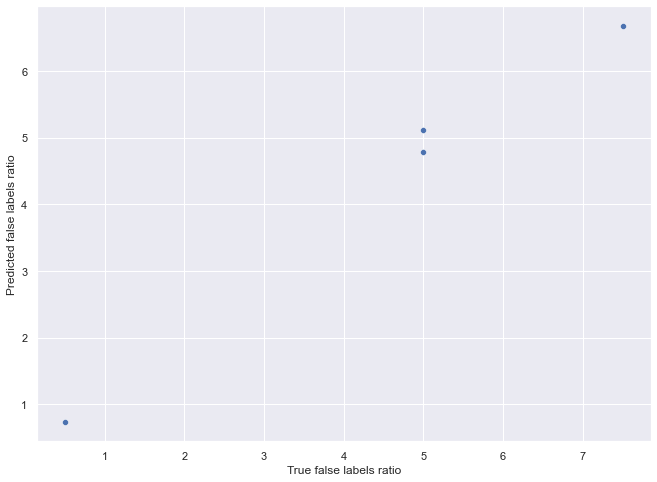

In [12]:
# init estimator, set best params
estimator, temp_params = util.init_estimator(estimator_name)
estimator.set_params(**best_params)

# train estimator
estimator.fit(X_train, y_train)
y_train_pred = estimator.predict(X_train)
y_pred = estimator.predict(X_test)

print(f'''
    {df_regr_results.iloc[index]['n']} observations
    ---------
    Regressor: {regressor}
        {round(df_regression[regressor].mean(), 5)} mean
        {round(df_regression[regressor].std(), 5)} std
    Regressand: False Labels Ratio
        {round(df_regression['ratio'].mean(), 5)} mean
        {round(df_regression['ratio'].std(), 5)} std

    Estimator: {estimator_name}
        {round(df_regr_results.iloc[index]['neg_rmse_train'], 5)} : neg_rmse_train
        {round(df_regr_results.iloc[index]['neg_rmse_test'], 5)} : neg_rmse_test
        {round(df_regr_results.iloc[index]['r2_train'], 5)} : r2_train
        {round(df_regr_results.iloc[index]['r2_test'], 5)} : r2_test
''')

# visualize estimator performance
sns.set(rc={'figure.figsize':(11,8)})
ax = sns.scatterplot(x=y_test, y=y_pred)
ax.set(xlabel='True false labels ratio', ylabel='Predicted false labels ratio')
plt.show()